# Import the required libraries

In [17]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to convert the Color Scheme of the Images
    - This is because OpenCV by default reads an image in BGR format. 
    - So it needs to be converted to RGB format

In [2]:
def bgr2rgb(img):
    imgr = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return imgr

# Reading all the images and changing them to the correct color scheme

In [3]:
bottomleft_img = cv2.imread("./ImageCollage dataset/bottom_left.jpg")
bottomleft_img = bgr2rgb(bottomleft_img)
bottomright_img = cv2.imread("./ImageCollage dataset/bottom_right.jpg")
bottomright_img = bgr2rgb(bottomright_img)
topleft_img = cv2.imread("./ImageCollage dataset/top_left.jpg")
topleft_img = bgr2rgb(topleft_img)
topright_img = cv2.imread("./ImageCollage dataset/top_right.jpg")
topright_img = bgr2rgb(topright_img)
centre_img = cv2.imread("./ImageCollage dataset/center.jpg")
centre_img = bgr2rgb(centre_img)

# Resizing each image to it's required size

In [22]:
bottomleft_img = cv2.resize(bottomleft_img, (200,200))
bottomright_img = cv2.resize(bottomright_img, (200,200))
topleft_img = cv2.resize(topleft_img, (200,200))
topright_img = cv2.resize(topright_img, (200,200))
centre_img = cv2.resize(centre_img, (100,100))

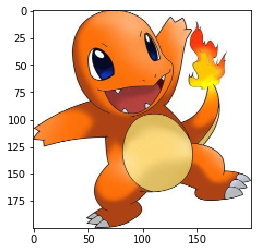

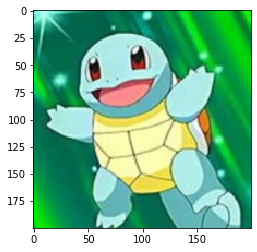

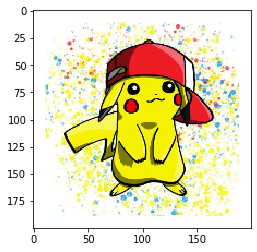

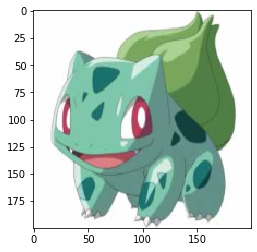

In [5]:
plt.imshow(bottomleft_img)
plt.show()
plt.imshow(bottomright_img)
plt.show()
plt.imshow(topleft_img)
plt.show()
plt.imshow(topright_img)
plt.show()

# The image to be placed at the centre requires a separate black boundary

In [6]:
cblk = np.zeros((120,120,3),np.uint8)
cblk[10:110,10:110] = centre_img

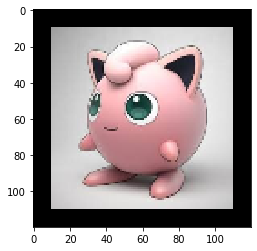

In [18]:
plt.imshow(cblk)

# Creating the final image
    - Create a balck image of required size (430 x 430 x 3)
    - Place all the images at their positions

In [7]:
black_img = np.zeros((430,430,3),np.uint8)

In [19]:
black_img[10:210,10:210] = topleft_img
black_img[220:420,10:210] = bottomleft_img
black_img[10:210,220:420] = topright_img
black_img[220:420,220:420] = bottomright_img
black_img[155:275,155:275] = cblk

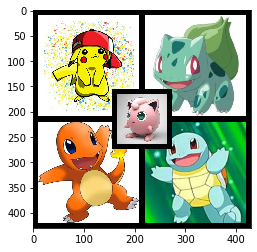

In [20]:
plt.imshow(black_img)

# Creating the required CSV File

## Getting the values of each color component in separate flat lists

In [13]:
red = []
green = []
blue = []
for i in range(430):
    for x in black_img[i,:,0]:
        red.append(x)
    for x in black_img[i,:,1]:
        green.append(x)
    for x in black_img[i,:,2]:
        blue.append(x)

## Converting the list to numpy arrays and reshaping for further use

In [14]:
red = np.array(red)
red = red.reshape((-1,1))
green = np.array(green)
green = green.reshape((-1,1))
blue = np.array(blue)
blue = blue.reshape((-1,1))

## Creating a 2D numpy array with rgb columns

In [25]:
rgb = np.hstack((red,green,blue))
df = pd.DataFrame(data = rgb,index = None, columns=["r","g","b"])
df.to_csv('Insta.csv', index = False)